In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import numpy as np

In [2]:
!pip install matplotlib
!pip install numpy

In [15]:
with open('sensitive_analysis_1v30_2v30_3v3.pkl','r') as inputs:
    data = pickle.load(inputs)[30:60]
with open('sensitive_analysis_2v2.pkl','r') as inputs:
    data.extend(pickle.load(inputs))
with open('sensitive_analysis_2v26.pkl','r') as inputs:
    data.extend(pickle.load(inputs))
with open('sensitive_analysis_2v42.pkl','r') as inputs:
    data.extend(pickle.load(inputs))
with open('sensitive_analysis_base.pkl','r') as inputsbase:
    data_base = pickle.load(inputsbase)

In [22]:
data[1]

([0, 0.0, 0.0, 0.0, 17.659, 0.0, 517.902],
 [[2.81, 4.349780148837676, 6.1], [0.6, 0.63, 0.67], [-0.25, -0.5, -1.0]],
 array([ 0.8040038 ,  0.97353309,  0.80904658,  1.28988973,  1.01965266,
         1.02162822,  0.88179992,  1.11677714,  1.09820726,  1.19260846,
         1.14585622,  1.21789031,  1.18350025,  1.22933556,  0.85616904,
         1.02526636,  0.99005862,  1.02654848,  0.99351106,  1.03762271,
         1.00354166,  1.05218366,  1.0179243 ,  1.04345911,  1.00987898,
         1.06351444,  1.02761032,  1.0651697 ,  1.03628994,  1.38403668,
         0.67004585,  0.93981327,  0.92772609,  0.95820911,  0.93680078,
         0.95716982,  0.93561362,  0.97054172,  0.9509749 ,  0.95339411,
         0.93251296,  0.96568631,  0.94929798,  0.96228733,  0.94411585,
         0.97983538,  0.89497647,  0.95202645,  0.93280968,  0.96347806,
         0.94727369,  0.96217479,  0.94220658,  0.97932347,  0.90251149,
         0.95757859,  0.9389028 ,  0.97675911,  0.90631972,  1.01500186,
      

In [29]:
def get_price_stat_ave(data,decision_times): #period average for each sample
    mitigation = []
    utility = []
    price = []
    a650 = []
    from tree import TreeModel 
    for i in range(len(data)): #load corresponding results
        mitigation.append(data[i][2])
        utility.append(data[i][3])
        price.append(data[i][4])
        a650.append(data[i][1][0][1])
    print(np.mean(a650))
    
    t = TreeModel(decision_times)
    nodes_index = []
    for i in range(t.num_periods):
        nodes_index.append(t.get_nodes_in_period(i)) #get nodes for slicing
    price_stat_ave = np.zeros((len(data), t.num_periods))
    for i in range(len(data)):
        for j in range(t.num_periods):
            price_stat_ave[i,j] = np.average(data[i][4][nodes_index[j][0]:nodes_index[j][1]+1])
    return price_stat_ave

def get_90_quantile(price_stat_ave):
    list0 = price_stat_ave[:,0]
    list1 = price_stat_ave[:,1]
    list2 = price_stat_ave[:,2]
    list3 = price_stat_ave[:,3]
    list4 = price_stat_ave[:,4]
    list5 = price_stat_ave[:,5]
    list_ = [list0,list1,list2,list3,list4,list5]
    for i in range(len(list_)):
        list_[i]=np.sort(list_[i])[5:95] #take the 90% of the sorted results
    list_min = []
    list_max = []
    for i in list_:
        list_min.append(i[0])
        list_max.append(i[-1])   
    return list_min,list_max #take the lower and upper bounds for the test results

4.61136382497
4.63


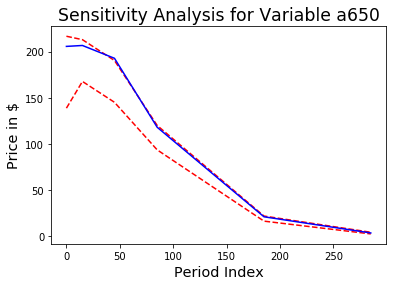

In [30]:
decision_times=[0, 15, 45, 85, 185, 285, 385]
price_stat_ave= get_price_stat_ave(data,decision_times)
price_stat_ave_base =get_price_stat_ave(data_base,decision_times)

list_min,list_max = get_90_quantile(price_stat_ave)
plt.figure()
plt.plot(decision_times[:-1],list_min, 'r--')
plt.plot(decision_times[:-1],list_max,'r--')
plt.plot(decision_times[:-1],price_stat_ave_base[0,:],'b')
plt.title('Sensitivity Analysis for Variable a650', size ='xx-large')
plt.ylabel('Price in $', size = 'x-large')
plt.xlabel('Period Index', size = 'x-large')
plt.savefig('sensitivity_analysis_a650')
#plt.xlim(decision_times)

In [ ]:
price_stat_ave_base

In [ ]:
!pip install numpy

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jun 20 10:26:46 2017

@author: matlabyy
"""

# -*- coding: utf-8 -*-
"""
Created on Fri Jun 16 15:16:44 2017

@author: Ted Yang
"""

import datetime as dt
from tree import TreeModel
from bau import DLWBusinessAsUsual
from cost import DLWCost
from damage_Yili import DLWDamage
from utility import EZUtility
from optimization import GeneticAlgorithm, GradientSearch
import numpy as np
import pickle
def base_case(change):
    time_list =list()
    print('Start',dt.datetime.time(dt.datetime.now()))
    time_list.append(dt.datetime.time(dt.datetime.now()))
    t = TreeModel(decision_times=[0, 15, 45, 85, 185, 285, 385])
    print('End tree',dt.datetime.time(dt.datetime.now()))
    time_list.append(dt.datetime.time(dt.datetime.now()))
    bau_default_model = DLWBusinessAsUsual()
    bau_default_model.bau_emissions_setup(tree=t)
    print('End bau',dt.datetime.time(dt.datetime.now()))
    time_list.append(dt.datetime.time(dt.datetime.now()))
    c = DLWCost(t, bau_default_model.emit_level[0], g=92.08, a=3.413, join_price=2000.0, max_price=2500.0,
					tech_const=1.5, tech_scale=0.0, cons_at_0=30460.0)
    print('End cost',dt.datetime.time(dt.datetime.now()))
    time_list.append(dt.datetime.time(dt.datetime.now()))
    df = DLWDamage(tree=t, bau=bau_default_model, cons_growth=0.015, ghg_levels=[450, 650, 1000], subinterval_len=5,change=change)    
    df.damage_simulation( draws=4, peak_temp=6.0, disaster_tail=18.0, tip_on=True, 
							 temp_map=0, temp_dist_params=None, maxh=100.0)
    print('End damage',dt.datetime.time(dt.datetime.now()))
    time_list.append(dt.datetime.time(dt.datetime.now()))
    u = EZUtility(tree=t, damage=df, cost=c, period_len=5.0, eis=0.9, ra=7.0, time_pref=0.005)
    print('End utility',dt.datetime.time(dt.datetime.now()))
    time_list.append(dt.datetime.time(dt.datetime.now()))
    ga_model = GeneticAlgorithm(pop_amount=150, num_generations=1, cx_prob=0.8, mut_prob=0.5, 
	                            bound=1.5, num_feature=63, utility=u, print_progress=True) 
    gs_model = GradientSearch(var_nums=63, utility=u, accuracy=1e-8, 
	                          iterations=1, print_progress=True)
    final_pop, fitness = ga_model.run()
    sort_pop = final_pop[np.argsort(fitness)][::-1]
    m_opt, u_opt = gs_model.run(initial_point_list=sort_pop, topk=1)

    print("SCC: ", c.price(0, m_opt[0], 0))
    print('End opt/End',dt.datetime.time(dt.datetime.now()))
    time_list.append(dt.datetime.time(dt.datetime.now()))
    result_time_list =[0]
    #change dt.time to dt.timedelta so that it can be added or minused
    temp_list =list()
    for x in time_list:
        temp_list.append( dt.timedelta(hours=x.hour, minutes=x.minute, seconds=x.second, microseconds=x.microsecond))
    for i in range(len(temp_list)-1):
        i+=1
        result_time_list.append((temp_list[i]-temp_list[i-1]).total_seconds())
    price_list = list()
    for decision_time in range(len(t.decision_times)-1):
    	start_node,end_node = t.get_nodes_in_period(decision_time)
    	average_mit = df.average_mitigation(m_opt,decision_time)
    	for index in range(end_node-start_node+1):
    		index_ori =index + start_node
    		price_list.append(c.price(t.decision_times[decision_time],m_opt[index_ori],average_mit[index]))
    return result_time_list,df.parameter_list, m_opt,u_opt,price_list
if __name__ == "__main__":
    
    result_list = list()
    for change in range(9):
        count =0
        while count <10:
	        x= base_case(change)
	        result_list.append(x)
	        count +=1
    with open('sensitive_analysis_9t30.pkl','wb') as f:
        pickle.dump(result_list,f)
#    with open('sensitive_analysis_100.pkl','rb') as inputs:
#        re = pickle.load(inputs)
#    print(re)